In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os
os.getcwd()

'c:\\Users\\IvanEsin\\OneDrive - Digital Hive\\Documenten\\GitHub\\Polaris_vs_Pandas\\benchmarks'

## PLOTS FOR READING BENCHMARKS

In [59]:
df=pd.read_csv('./csv_benchmarks/fct_benchmarks.csv')

In [60]:
df['duration'] = df.groupby(['cmdline_file', 'cmdline_args'])['timestamp'].transform(lambda x: x - x.min())


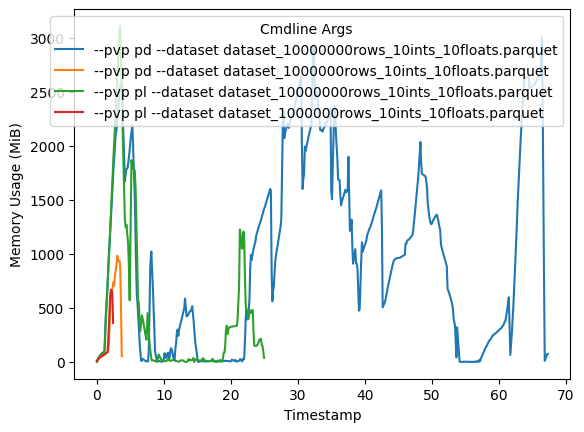

In [61]:
# Create a line plot with color based on cmdline_args
sns.lineplot(data=df, x='duration', y='mem_usage_mib', hue='cmdline_args')

# Set the x-axis and y-axis labels
plt.xlabel('Timestamp')
plt.ylabel('Memory Usage (MiB)')

# Show the legend
plt.legend(title='Cmdline Args')

# Show the plot
plt.show()


In [75]:
df = df.rename(columns={'Unnamed: 0': 'i'})

,i,mem_usage_mib,timestamp,cmdline_file,cmdline_args,duration
0,0,1.097656,1.698186e+09,./benchmarks/filtering.py,--pvp pd --dataset dataset_10000000rows_10ints...,0.0000
1,1,17.843750,1.698186e+09,./benchmarks/filtering.py,--pvp pd --dataset dataset_10000000rows_10ints...,0.1090
2,2,32.691406,1.698186e+09,./benchmarks/filtering.py,--pvp pd --dataset dataset_10000000rows_10ints...,0.2139
3,3,45.832031,1.698186e+09,./benchmarks/filtering.py,--pvp pd --dataset dataset_10000000rows_10ints...,0.3307
4,4,57.175781,1.698186e+09,./benchmarks/filtering.py,--pvp pd --dataset dataset_10000000rows_10ints...,0.4363
...,...,...,...,...,...,...
719,17,607.859375,1.698186e+09,./benchmarks/filtering.py,--pvp pl --dataset dataset_1000000rows_10ints_...,1.9716
720,18,665.980469,1.698186e+09,./benchmarks/filtering.py,--pvp pl --dataset dataset_1000000rows_10ints_...,2.0834
721,19,666.316406,1.698186e+09,./benchmarks/filtering.py,--pvp pl --dataset dataset_1000000rows_10ints_...,2.1923
722,20,619.707031,1.698186e+09,./benchmarks/filtering.py,--pvp pl --dataset dataset_1000000rows_10ints_...,2.3048


In [93]:
df_1000000 = df[df['cmdline_args'].isin(['--pvp pd --dataset dataset_1000000rows_10ints_10floats.parquet', '--pvp pl --dataset dataset_1000000rows_10ints_10floats.parquet'])]
df_10000000 = df[df['cmdline_args'].isin(['--pvp pd --dataset dataset_10000000rows_10ints_10floats.parquet', '--pvp pl --dataset dataset_10000000rows_10ints_10floats.parquet'])]

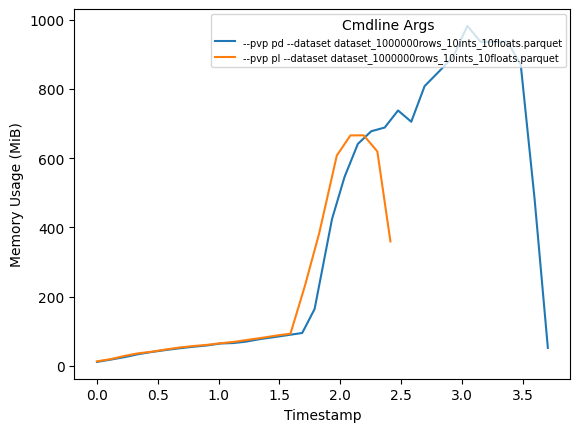

In [106]:
# Create a line plot with color based on cmdline_args
sns.lineplot(data=df_1000000, x='duration', y='mem_usage_mib', hue='cmdline_args')

# Set the x-axis and y-axis labels
plt.xlabel('Timestamp')
plt.ylabel('Memory Usage (MiB)')

# Show the legend
plt.legend(title='Cmdline Args', loc='upper right', fontsize=7)

# Show the plot
plt.show()

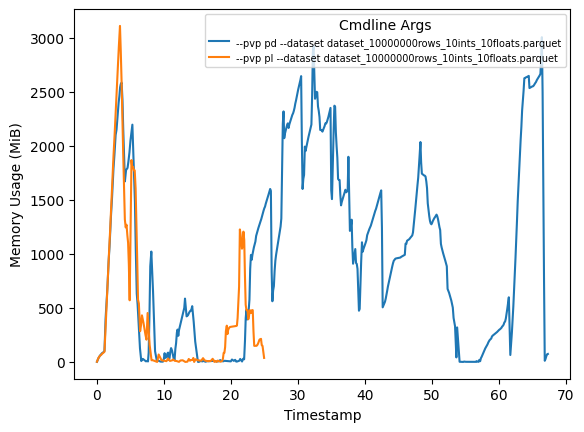

In [105]:
# Create a line plot with color based on cmdline_args
sns.lineplot(data=df_10000000, x='duration', y='mem_usage_mib', hue='cmdline_args')

# Set the x-axis and y-axis labels
plt.xlabel('Timestamp')
plt.ylabel('Memory Usage (MiB)')

# Show the legend
plt.legend(title='Cmdline Args', loc='upper right', fontsize=7)

# Show the plot
plt.show()

## PREPROCESS DATASETS

In [148]:
dfall=pd.read_csv('./csv_benchmarks/all.csv')
dfall['duration'] = dfall.groupby(['cmdline_file', 'cmdline_args'])['timestamp'].transform(lambda x: x - x.min())
dfall = dfall.rename(columns={'Unnamed: 0': 'i'})
dfall


,i,mem_usage_mib,timestamp,cmdline_file,cmdline_args,duration
0,0,1.097656,1.698186e+09,./benchmarks/filtering.py,--pvp pd --dataset dataset_10000000rows_10ints...,0.0000
1,1,17.843750,1.698186e+09,./benchmarks/filtering.py,--pvp pd --dataset dataset_10000000rows_10ints...,0.1090
2,2,32.691406,1.698186e+09,./benchmarks/filtering.py,--pvp pd --dataset dataset_10000000rows_10ints...,0.2139
3,3,45.832031,1.698186e+09,./benchmarks/filtering.py,--pvp pd --dataset dataset_10000000rows_10ints...,0.3307
4,4,57.175781,1.698186e+09,./benchmarks/filtering.py,--pvp pd --dataset dataset_10000000rows_10ints...,0.4363
...,...,...,...,...,...,...
9643,23,1032.089844,1.698223e+09,./benchmarks/joinings.py,--pvp pl --dataset dataset_1000000rows_10ints_...,2.7047
9644,24,1032.089844,1.698223e+09,./benchmarks/joinings.py,--pvp pl --dataset dataset_1000000rows_10ints_...,2.8160
9645,25,1032.089844,1.698223e+09,./benchmarks/joinings.py,--pvp pl --dataset dataset_1000000rows_10ints_...,2.9276
9646,26,999.738281,1.698223e+09,./benchmarks/joinings.py,--pvp pl --dataset dataset_1000000rows_10ints_...,3.0335


In [149]:
dfall['pvp'] = dfall['cmdline_args'].str.extract(r'--pvp (\w+)')
dfall['dataset'] = dfall['cmdline_args'].str.extract(r'--dataset (\w+)')
dfall['type_join'] = dfall['cmdline_args'].str.extract(r'--type_join (\w+)')
dfall['join_on'] = dfall['cmdline_args'].str.extract(r'--join_on (\w+)')
dfall

,i,mem_usage_mib,timestamp,cmdline_file,cmdline_args,duration,pvp,dataset,type_join,join_on
0,0,1.097656,1.698186e+09,./benchmarks/filtering.py,--pvp pd --dataset dataset_10000000rows_10ints...,0.0000,pd,dataset_10000000rows_10ints_10floats,NaN,NaN
1,1,17.843750,1.698186e+09,./benchmarks/filtering.py,--pvp pd --dataset dataset_10000000rows_10ints...,0.1090,pd,dataset_10000000rows_10ints_10floats,NaN,NaN
2,2,32.691406,1.698186e+09,./benchmarks/filtering.py,--pvp pd --dataset dataset_10000000rows_10ints...,0.2139,pd,dataset_10000000rows_10ints_10floats,NaN,NaN
3,3,45.832031,1.698186e+09,./benchmarks/filtering.py,--pvp pd --dataset dataset_10000000rows_10ints...,0.3307,pd,dataset_10000000rows_10ints_10floats,NaN,NaN
4,4,57.175781,1.698186e+09,./benchmarks/filtering.py,--pvp pd --dataset dataset_10000000rows_10ints...,0.4363,pd,dataset_10000000rows_10ints_10floats,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
9643,23,1032.089844,1.698223e+09,./benchmarks/joinings.py,--pvp pl --dataset dataset_1000000rows_10ints_...,2.7047,pl,dataset_1000000rows_10ints_10floats,outer,country_code
9644,24,1032.089844,1.698223e+09,./benchmarks/joinings.py,--pvp pl --dataset dataset_1000000rows_10ints_...,2.8160,pl,dataset_1000000rows_10ints_10floats,outer,country_code
9645,25,1032.089844,1.698223e+09,./benchmarks/joinings.py,--pvp pl --dataset dataset_1000000rows_10ints_...,2.9276,pl,dataset_1000000rows_10ints_10floats,outer,country_code
9646,26,999.738281,1.698223e+09,./benchmarks/joinings.py,--pvp pl --dataset dataset_1000000rows_10ints_...,3.0335,pl,dataset_1000000rows_10ints_10floats,outer,country_code


## PLOTS FOR FILTERING BENCHMARKS

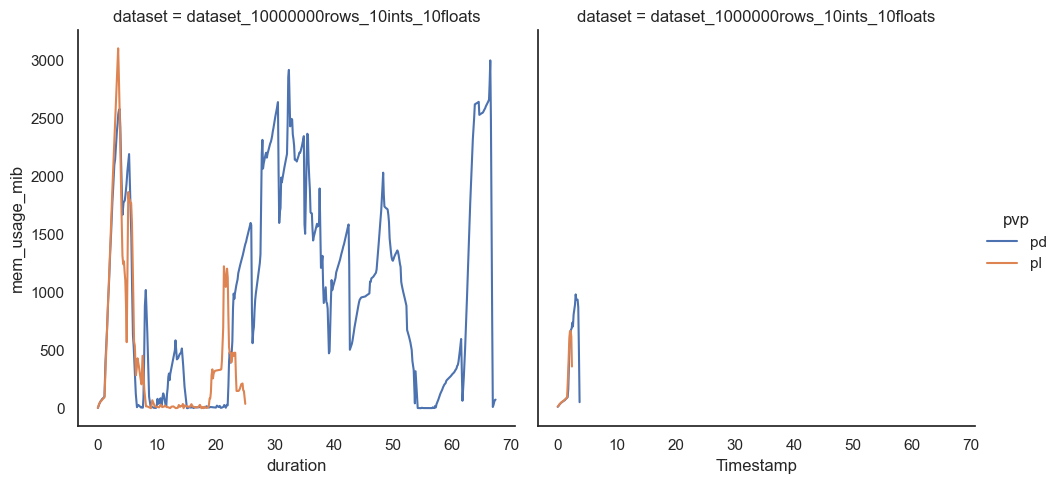

In [193]:
dffilter=dfall[dfall['cmdline_file'] == './benchmarks/filtering.py']
# dffilter1000000=dffilter[dffilter['dataset'] == 'dataset_1000000rows_10ints_10floats']
# dffilter100000=dffilter[dffilter['dataset'] == 'dataset_100000rows_10ints_10floats']


# Create a line plot with color based on cmdline_args
sns.relplot(
    data=dffilter, x='duration', y='mem_usage_mib', hue='pvp', col='dataset', kind='line')

# Set the x-axis and y-axis labels
plt.xlabel('Timestamp')
plt.ylabel('Memory Usage (MiB)')

# Show the legend
#plt.legend(title='Cmdline Args', loc='upper left', fontsize=7)

# Show the plot
plt.show()

## PLOTS FOR JOININGS BENCHMARKS

In [196]:
dfjoins=dfall[dfall['cmdline_file'] == './benchmarks/joinings.py']
dfjoins10000000=dfjoins[dfjoins['dataset'] == 'dataset_10000000rows_10ints_10floats']
dfjoins1000000=dfjoins[dfjoins['dataset'] == 'dataset_1000000rows_10ints_10floats']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


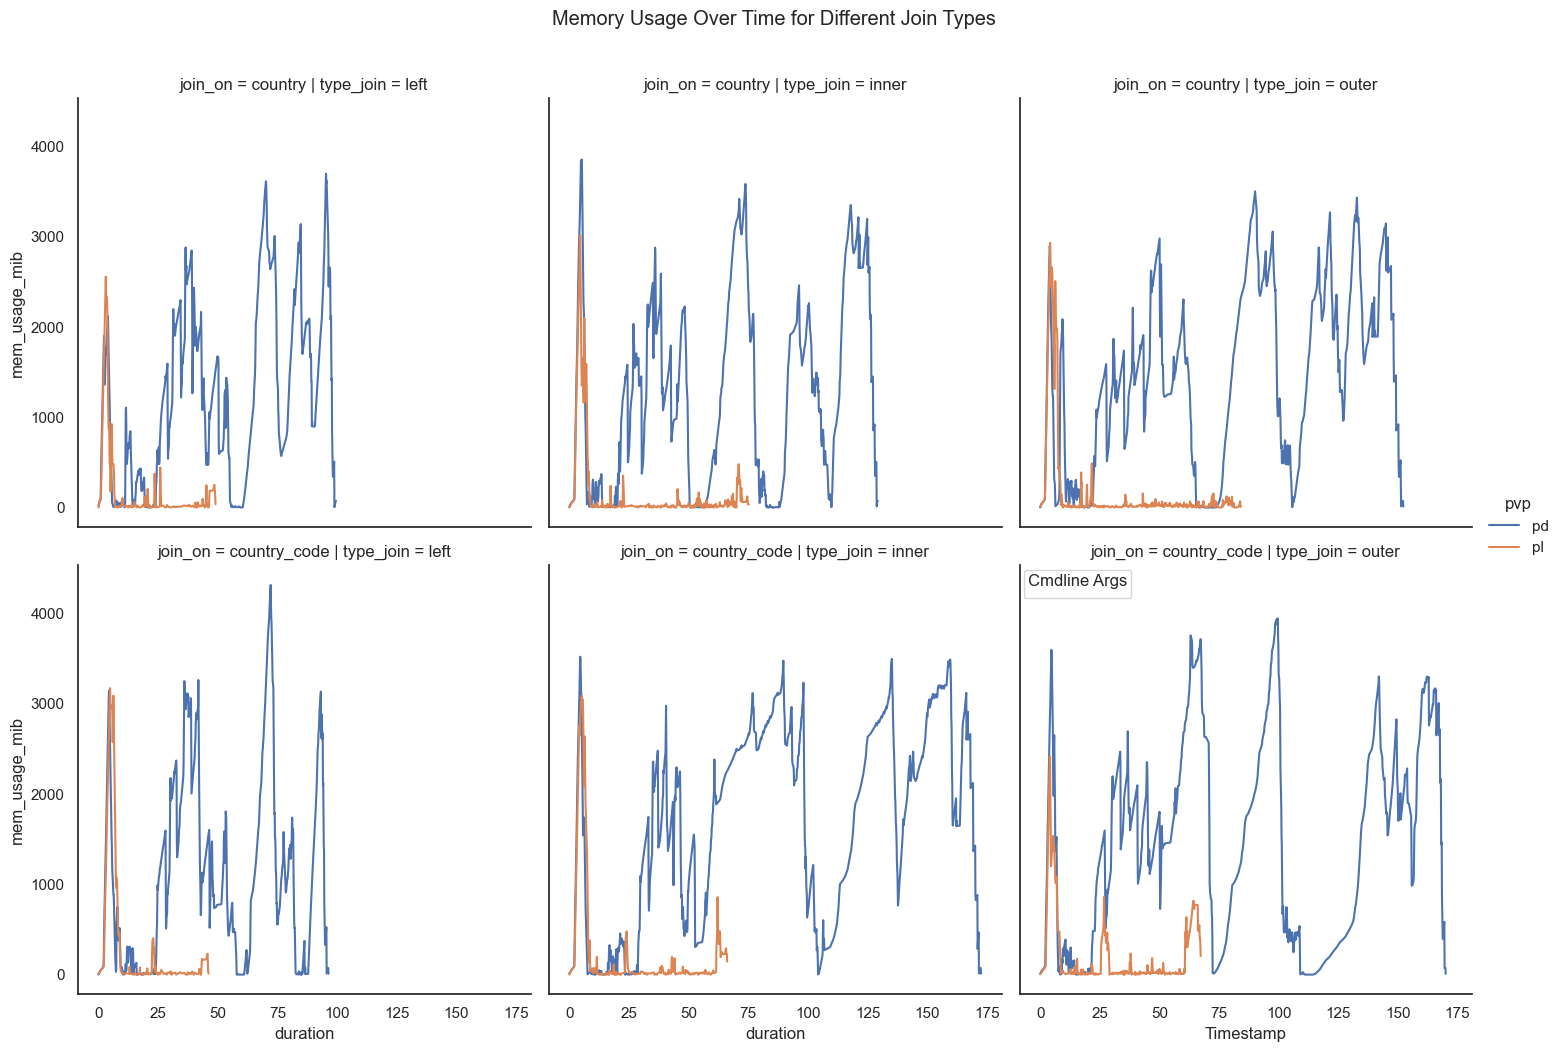

In [197]:
# Create a line plot with color based on cmdline_args
sns.relplot(
    data=dfjoins10000000, x='duration', y='mem_usage_mib', hue='pvp', kind='line', col='type_join', row='join_on')

sns.set_theme(style='white')

# Set the x-axis and y-axis labels
plt.xlabel('Timestamp')
plt.ylabel('Memory Usage (MiB)')
plt.suptitle('Memory Usage Over Time for Different Join Types', y=1.05)


# Show the legend
plt.legend(title='Cmdline Args', loc='upper left', fontsize=7)

# Show the plot
plt.show()

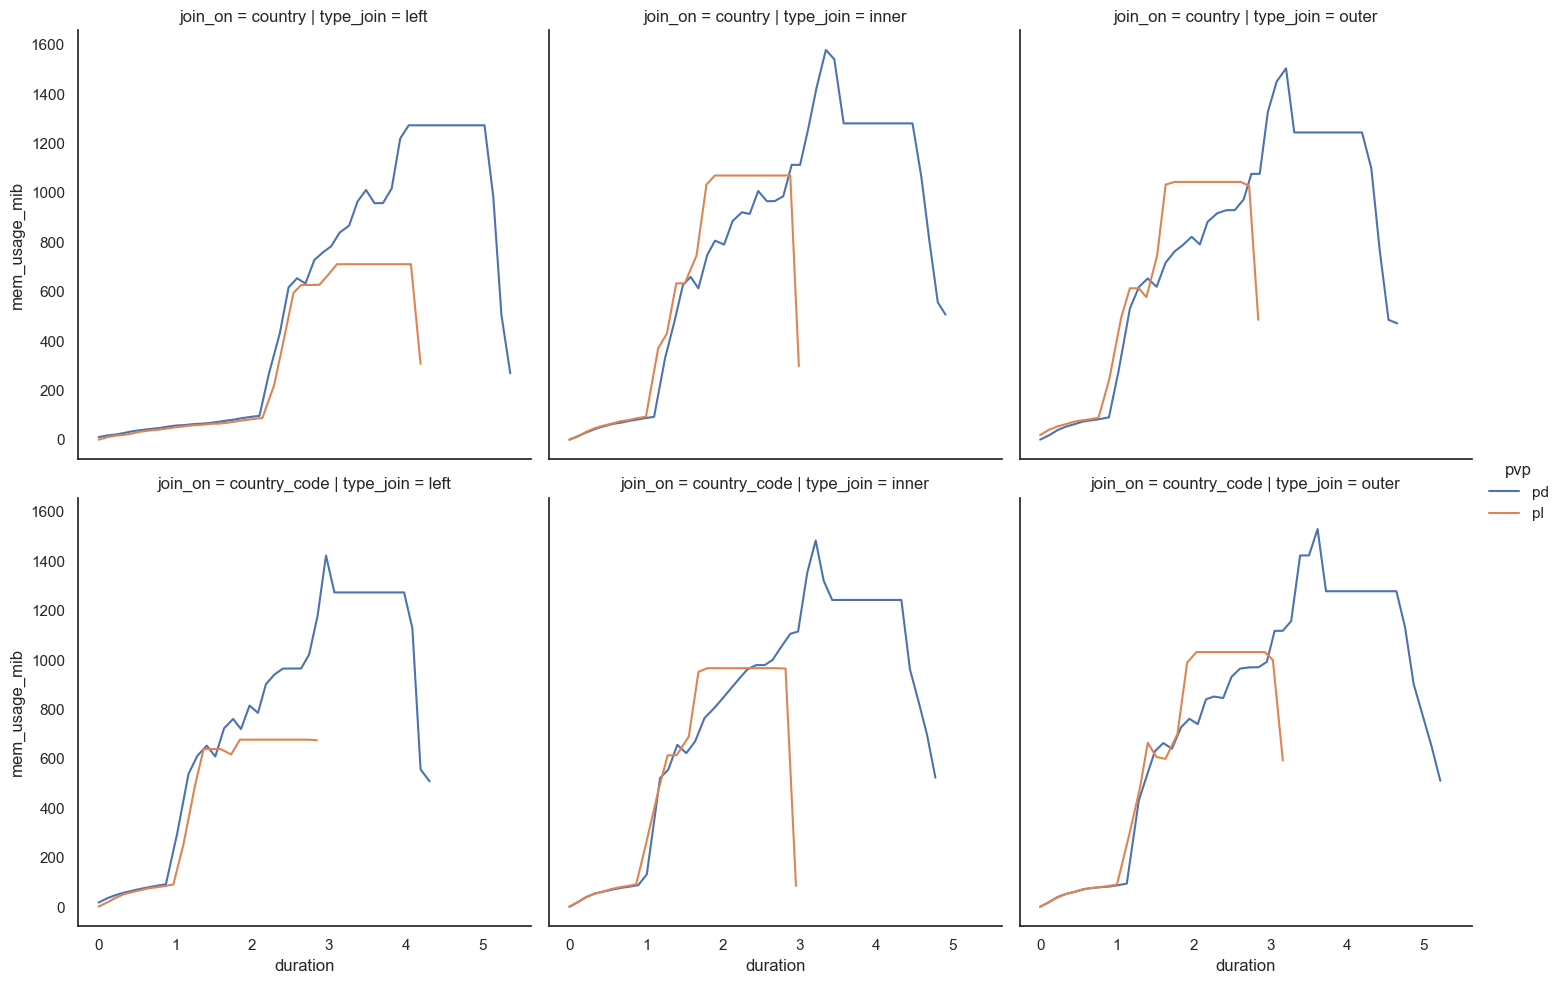

In [199]:
# Create a line plot with color based on cmdline_args
sns.relplot(
    data=dfjoins1000000, x='duration', y='mem_usage_mib', hue='pvp', kind='line', col='type_join', row='join_on')

# # Set the x-axis and y-axis labels
# plt.xlabel('duration')
# plt.ylabel('Memory Usage (MiB)')

# # Show the legend
# plt.legend(title='Cmdline Args', loc='upper left', fontsize=7)

# Show the plot
plt.show()

## PLOTS FOR AGGREGATING BENCHMARKS

In [190]:
dfagg=pd.read_csv('./csv_benchmarks/all_and_agg.csv')
dfagg['duration'] = dfagg.groupby(['cmdline_file', 'cmdline_args'])['timestamp'].transform(lambda x: x - x.min())
dfagg = dfagg.rename(columns={'Unnamed: 0': 'i'})
dfagg


,i,mem_usage_mib,timestamp,cmdline_file,cmdline_args,duration
0,0,1.097656,1.698186e+09,./benchmarks/filtering.py,--pvp pd --dataset dataset_10000000rows_10ints...,0.0000
1,1,17.843750,1.698186e+09,./benchmarks/filtering.py,--pvp pd --dataset dataset_10000000rows_10ints...,0.1090
2,2,32.691406,1.698186e+09,./benchmarks/filtering.py,--pvp pd --dataset dataset_10000000rows_10ints...,0.2139
3,3,45.832031,1.698186e+09,./benchmarks/filtering.py,--pvp pd --dataset dataset_10000000rows_10ints...,0.3307
4,4,57.175781,1.698186e+09,./benchmarks/filtering.py,--pvp pd --dataset dataset_10000000rows_10ints...,0.4363
...,...,...,...,...,...,...
10248,19,676.464844,1.698228e+09,./benchmarks/aggregating.py,--pvp pl --dataset dataset_1000000rows_10ints_...,2.1825
10249,20,676.781250,1.698228e+09,./benchmarks/aggregating.py,--pvp pl --dataset dataset_1000000rows_10ints_...,2.3025
10250,21,633.945312,1.698228e+09,./benchmarks/aggregating.py,--pvp pl --dataset dataset_1000000rows_10ints_...,2.4163
10251,22,411.011719,1.698228e+09,./benchmarks/aggregating.py,--pvp pl --dataset dataset_1000000rows_10ints_...,2.5369


In [191]:
dfagg['pvp'] = dfagg['cmdline_args'].str.extract(r'--pvp (\w+)')
dfagg['dataset'] = dfagg['cmdline_args'].str.extract(r'--dataset (\w+)')
dfagg['type_join'] = dfagg['cmdline_args'].str.extract(r'--type_join (\w+)')
dfagg['join_on'] = dfagg['cmdline_args'].str.extract(r'--join_on (\w+)')
dfagg

,i,mem_usage_mib,timestamp,cmdline_file,cmdline_args,duration,pvp,dataset,type_join,join_on
0,0,1.097656,1.698186e+09,./benchmarks/filtering.py,--pvp pd --dataset dataset_10000000rows_10ints...,0.0000,pd,dataset_10000000rows_10ints_10floats,NaN,NaN
1,1,17.843750,1.698186e+09,./benchmarks/filtering.py,--pvp pd --dataset dataset_10000000rows_10ints...,0.1090,pd,dataset_10000000rows_10ints_10floats,NaN,NaN
2,2,32.691406,1.698186e+09,./benchmarks/filtering.py,--pvp pd --dataset dataset_10000000rows_10ints...,0.2139,pd,dataset_10000000rows_10ints_10floats,NaN,NaN
3,3,45.832031,1.698186e+09,./benchmarks/filtering.py,--pvp pd --dataset dataset_10000000rows_10ints...,0.3307,pd,dataset_10000000rows_10ints_10floats,NaN,NaN
4,4,57.175781,1.698186e+09,./benchmarks/filtering.py,--pvp pd --dataset dataset_10000000rows_10ints...,0.4363,pd,dataset_10000000rows_10ints_10floats,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
10248,19,676.464844,1.698228e+09,./benchmarks/aggregating.py,--pvp pl --dataset dataset_1000000rows_10ints_...,2.1825,pl,dataset_1000000rows_10ints_10floats,NaN,NaN
10249,20,676.781250,1.698228e+09,./benchmarks/aggregating.py,--pvp pl --dataset dataset_1000000rows_10ints_...,2.3025,pl,dataset_1000000rows_10ints_10floats,NaN,NaN
10250,21,633.945312,1.698228e+09,./benchmarks/aggregating.py,--pvp pl --dataset dataset_1000000rows_10ints_...,2.4163,pl,dataset_1000000rows_10ints_10floats,NaN,NaN
10251,22,411.011719,1.698228e+09,./benchmarks/aggregating.py,--pvp pl --dataset dataset_1000000rows_10ints_...,2.5369,pl,dataset_1000000rows_10ints_10floats,NaN,NaN


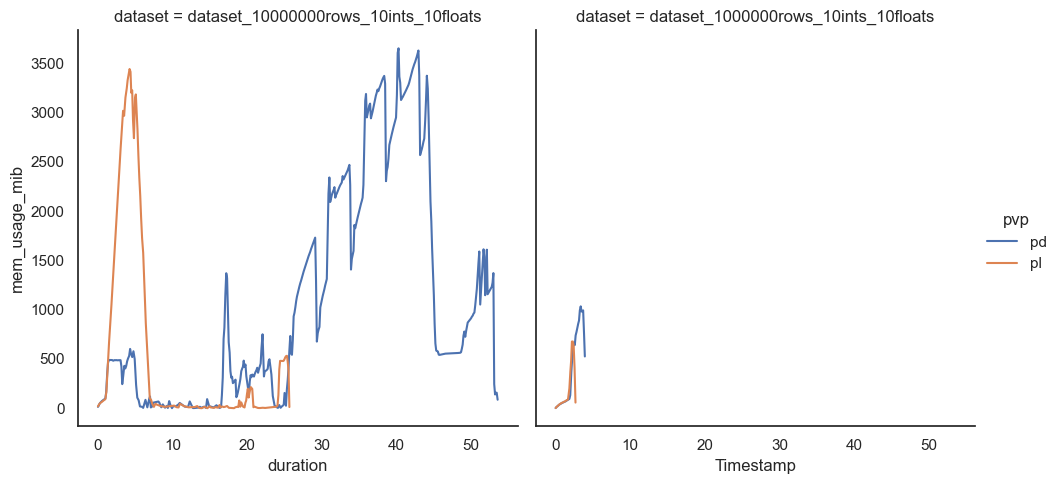

In [192]:
dfaggregating=dfagg[dfagg['cmdline_file'] == './benchmarks/aggregating.py']
# dfaggregating1000000=dfaggregating[dfaggregating['dataset'] == 'dataset_1000000rows_10ints_10floats']
# dfaggregating100000=dfaggregating[dfaggregating['dataset'] == 'dataset_100000rows_10ints_10floats']


# Create a line plot with color based on cmdline_args
sns.relplot(
    data=dfaggregating, x='duration', y='mem_usage_mib', hue='pvp', col='dataset', kind='line')

# Set the x-axis and y-axis labels
plt.xlabel('Timestamp')
plt.ylabel('Memory Usage (MiB)')

# Show the legend
#plt.legend(title='Cmdline Args', loc='upper left', fontsize=7)

# Show the plot
plt.show()